In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
np.random.seed(22)

Prepare Data

In [4]:
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

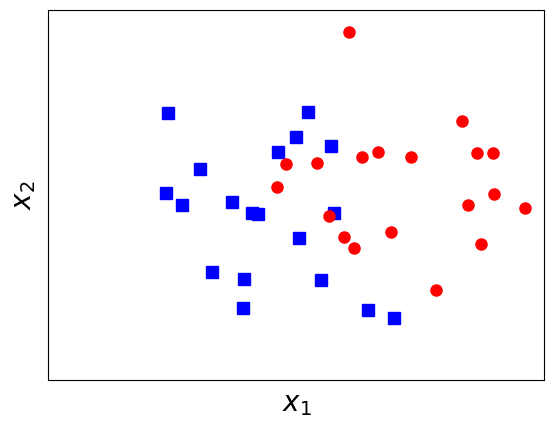

In [5]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [6]:
X0.shape

(20, 2)

Utils Function

In [7]:
def sigmoid(S):
    """
    S: an numpy array
    return sigmoid function of each element of S
    """
    return 1/(1 + np.exp(-S))

In [8]:
def bias_trick(X):
    N = X.shape[0]
    return np.concatenate((X, np.ones((N, 1))), axis = 1)

In [9]:
def prob(w, X):
    """
    X: a 2d numpy array of shape (N, d). N datatpoint, each with size d
    w: a 1d numpy array of shape (d)
    """
    return sigmoid(X.dot(w))

In [10]:
def loss(w, X, y, lam):
    """
    X, w as in prob 
    y: a 1d numpy array of shape (N). Each elem = 0 or 1 
    """
    z = prob(w, X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

In [11]:
def predict(w, X, threshold = 0.5):
    """
    predict output of each row of X
    X: a numpy array of shape
    threshold: a threshold between 0 and 1 
    """
    res = np.zeros(X.shape[0])
    res[np.where(prob(w, X) > threshold)[0]] = 1
    return res

In [12]:
def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
    # lam - regularization paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init 
    # store history of loss in loss_hist
    loss_hist = [loss(w_init, X, y, lam)]
    ep = 0 
    while ep < nepoches: 
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi + lam*w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break 
        w_old = w
    return w, loss_hist

Main

In [13]:
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar 
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)

eta = .05 
d = Xbar.shape[1]
w_init = np.random.randn(d)
lam = 0.0001

# w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)

w, loss_hist = logistic_regression(w_init, Xbar, y, lam, lr = 0.05, nepoches = 500)

In [14]:
w

array([-10.69881948,   2.4890927 ,   1.60789727])

Visualization

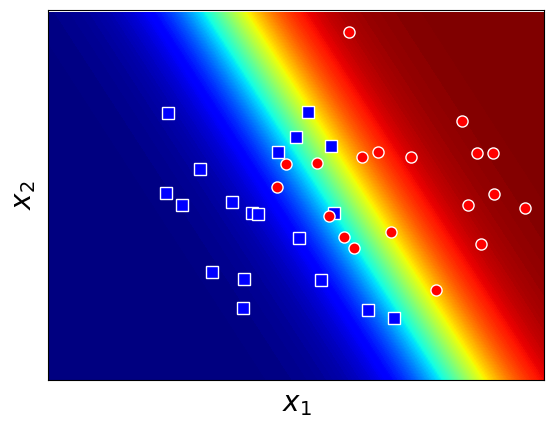

In [15]:
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
zm = sigmoid(w[0] + w[1]*xm + w[2]*ym)

CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1, markeredgecolor = 'w')
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1, markeredgecolor = 'w')
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()